# Data Pipelines

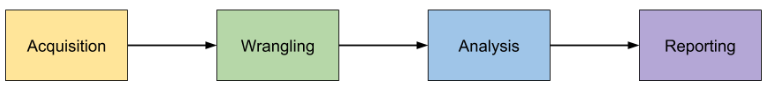

Typically, there are <u>four(4) stages</u> in an analyst's data pipeline:

- <b><u>`Acquisition`</u></b>: You need to acquire and ingest the data from a data source.
- <b><u>`Wrangling`</u></b>: You need to wrangle the data and prepare it to be analyzed.
- <b><u>`Analysis`</u></b>: You need to apply analytical methods and        perform aggregations necessary <br>   to obtain the insights you seek.
- <b><u>`Reporting`</u></b>: You must communicate the findings to the appropriate stakeholders via reports and visualizations.

# The highest average. fuel-efficiency Report

<b>- To produce a report showing the top 10 manufacturers with the highest average fuel-efficiency across all their vehicles  </b>

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('./data/vehicles.csv')
data.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [3]:
data.shape

(35952, 15)

## Filter the data set for the year 2016

In [4]:
year =2016
mask = data['Year'] == year

df_filtered = data.loc[mask,:]
df_filtered.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
45,Acura,ILX,2016,2.4,4.0,Auto(AM8),Front-Wheel Drive,Compact Cars,Premium,11.365862,25,36,29,305.0,1400
123,Acura,MDX 2WD,2016,3.5,6.0,Automatic (S9),Front-Wheel Drive,Small Sport Utility Vehicle 2WD,Premium,14.330870,20,27,23,390.0,1750
124,Acura,MDX 2WD,2016,3.5,6.0,Automatic (S9),Front-Wheel Drive,Small Sport Utility Vehicle 2WD,Premium,14.982273,19,27,22,403.0,1850
138,Acura,MDX 4WD,2016,3.5,6.0,Automatic (S9),All-Wheel Drive,Small Sport Utility Vehicle 4WD,Premium,14.982273,19,26,22,409.0,1850
139,Acura,MDX 4WD,2016,3.5,6.0,Automatic (S9),All-Wheel Drive,Small Sport Utility Vehicle 4WD,Premium,15.695714,18,26,21,412.0,1950


In [5]:
data['Combined MPG'].sort_values() # values between 7 - 56

20894     7
20896     7
20897     7
20898     7
20895     7
         ..
17526    53
17522    53
17524    53
33280    56
33279    56
Name: Combined MPG, Length: 35952, dtype: int64

>- Make:          the vehicle's manufacturer
>- Combined MPG:  the fuel efficiency for every vehicle

In [6]:
# the result of top 10 manufaturers
df_result = df_filtered.groupby(by='Make', as_index=False).agg({'Combined MPG': 'mean'}) \
                       .sort_values(by='Combined MPG', ascending=False)
results = df_result.head(10).reset_index(drop=True)
results

,Make,Combined MPG
0,smart,35.500000
1,Mazda,30.625000
2,Scion,30.000000
3,Honda,29.310345
4,MINI,28.176471
5,Alfa Romeo,28.000000
6,Fiat,28.000000
7,Volkswagen,27.151515
8,Subaru,26.619048
9,Hyundai,26.250000


## Data Visualization

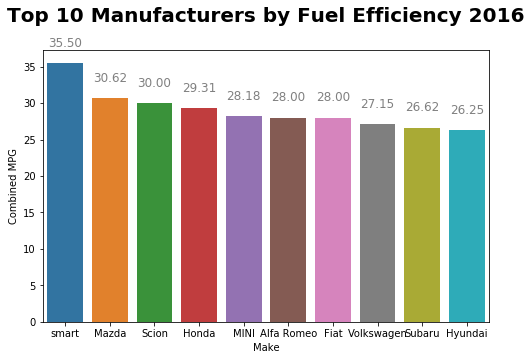

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

title = f'Top 10 Manufacturers by Fuel Efficiency {str(year)}'

fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.barplot(data=results, x='Make', y='Combined MPG')
plt.title(title + "\n", fontweight='bold',fontsize=20)

#annotate axis = seaborn axis
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(),                          # text : str
                (p.get_x() + p.get_width() / 2., p.get_height()), # xy : (float, float) -The point *(x,y)* to annotate
                 ha='center', 
                 va='center', 
                 fontsize=12, color='gray', 
                 xytext=(0, 20),
                 textcoords='offset points')

In [8]:
fig.savefig(title + '.png')

## Automate pipeline

In [ ]:
# fuel_efficiency_top10.py  file